In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes
import SlantStack

Imported MigPreFuncoes now
Imported SlantStack now


In [2]:
dx=1
nt=nz=120
ntr=nx=80 
dt=0.004
dz=1
c=250
dt=0.004

#1/250 = 0.004 = dt

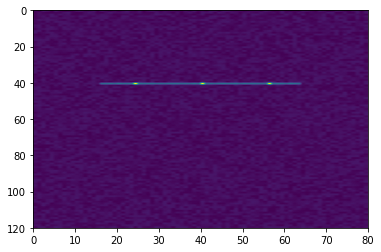

In [3]:
MOD = np.zeros([ntr,nt])
nx=ntr

x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))


for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nt/3))
    MOD[i,z]=1
    MOD[int(np.round(1.5*nx/5)),int(np.round(nt/3))]=3
    MOD[int(np.round(2.5*nx/5)),int(np.round(nt/3))]=3
    MOD[int(np.round(3.5*nx/5)),int(np.round(nt/3))]=3
            
nn = np.random.rand(ntr,nt)
MOD = MOD+(nn-0.5)*0.2

R = MOD.T

plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.show()

In [ ]:
pmin=-3
pmax=3
dp=0.1

S,pmaxS,taumaxS,smax,ip,itau = SlantStack.slant_stack(pmin,pmax,dp,0,nt*dt,dt,MOD.T,1.0,dt,0,0)

plt.imshow(S,extent=[pmin,pmax,nt*dt,0],aspect="auto")
plt.colorbar()
plt.xlabel('p')
plt.ylabel('tau')
plt.show()

In [ ]:
t1 = np.degrees(np.arctan(pmaxS))
print("pmax MOD1 =", pmaxS)
print(f"theta 1 = {t1} graus")

(120, 80)


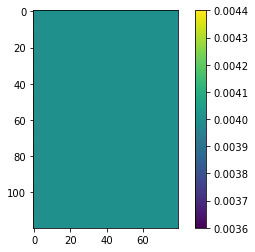

In [4]:
c = 250

SW=np.ones([nt,ntr])*1/c
print(SW.shape)
plt.imshow(SW)
plt.colorbar()
plt.show()

TTh.shape=(80, 120, 80)


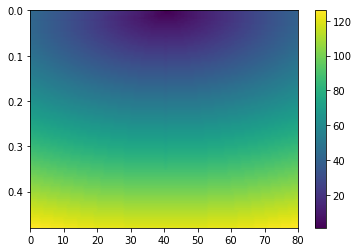

TSX.shape=(120, 80)


In [5]:
with open('Data/raiosSlantStack.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

TSX = (TTh[40,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nt*dt, 0], aspect='auto')
plt.colorbar()
plt.show()

timer=np.round(TTh/dt)+1

print(f"TSX.shape={TSX.shape}")

In [6]:
#Wavelet

nx=ntr
fr=40
nps=200
dt=.004
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
#print(nt)

nd2=nt+1; 
W=np.zeros(2*nt);
#print(W.shape)
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

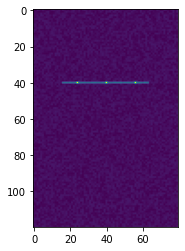

In [7]:
nx=ntr

#Modelo:
R = MOD.T

plt.imshow(R)
plt.show()

In [8]:
#### Create file with all shot gathers
#
#nsx=nx #105  #numero de tiros (pode ser no máximo o valor de TTh axis=0)
#ngx=nx #105   #numero de receptores (pode ser no máximo o valor de TTh axis=1)
##Loop over shots
#
#for isx in range(0,nsx,1):
#    print('shot', isx)
#    D = np.zeros([nt,ngx])
#    TSX = (TTh[isx,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
#
#
#    # Loop Over Traces
#    for gx in range(0,ngx):
#        TXG=(TTh[gx,:,:]/dt+1).astype(int)  # Traveltime in heterogeneous medium (indexes)
#                         
#      
#        #Loop over time sample in a trace
#        for t in range(0,nt):
#            M=W[t-(TSX+TXG)+nt+1]*R
#            D[t,gx]=np.sum(M.flatten('F'));
#            #D[t,gx]=np.sum(M.flatten());
#        gather1=np.diff(D[:,:],n=2,axis=0);
#        
#    filename = 'Data/CSG_diffbar/gather_shot{}'.format(isx)
#    with open(filename, 'wb') as f:
#        np.save(f, gather1)

In [9]:
files = []

for i in range(0,80,1):
    filename = 'Data/CSG_diffbar/gather_shot{}'.format(i)
    
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

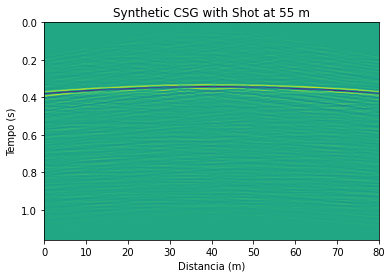

In [10]:
plt.imshow(files[40],aspect='auto',extent=[0, nx*dx, nt*dt, 0])

plt.title('Synthetic CSG with Shot at 55 m')
plt.xlabel('Distancia (m)')
plt.ylabel('Tempo (s)')
plt.show()

In [11]:
shot = 40
filename = 'Data/CSG_diffbar/gather_shot{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1 = np.load(file)

win=20*dt
dwin=dt
app=15
isx=shot

# Slant Stack

In [12]:
#xwin=twin=25
#m_taumax,m_pmax, s_max = SlantStack.local_window(MOD.T,xwin,twin,dx,dt)
#
#with open("Data/CSG_diffbar/janela_diffbar", "wb") as f:
#    np.save(f, m_pmax)

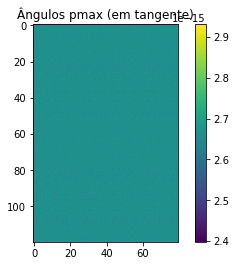

In [13]:
with open("Data/CSG_diffbar/janela_diffbar", "rb") as f:
    tst = np.load(f)

#plt.figure(figsize=(5,6))
plt.imshow(tst)
plt.title("Ângulos pmax (em tangente)")
plt.colorbar()
plt.show()

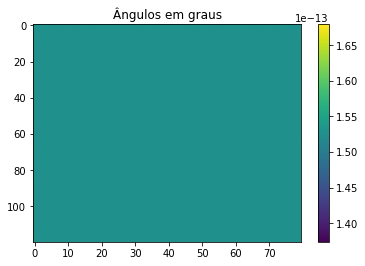

In [16]:
m_theta = np.degrees(np.arctan(tst))
plt.imshow(m_theta, aspect="auto")
plt.title("Ângulos em graus")
plt.colorbar()
plt.show()

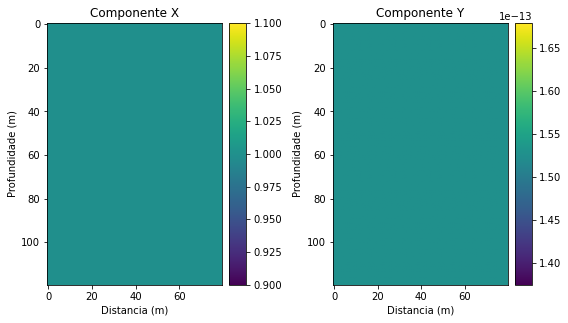

In [21]:
X = np.cos(m_theta)
Y = np.sin(m_theta)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(121)
ax1.set_title("Componente X")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(X)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Componente Y")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(Y)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

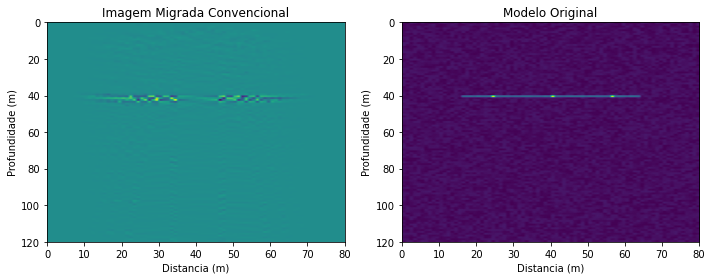

In [24]:
win=10*dt
dwin=dt

app=15

mig_winapp = MigPreFuncoes.migvsp_winapp(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_winapp, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

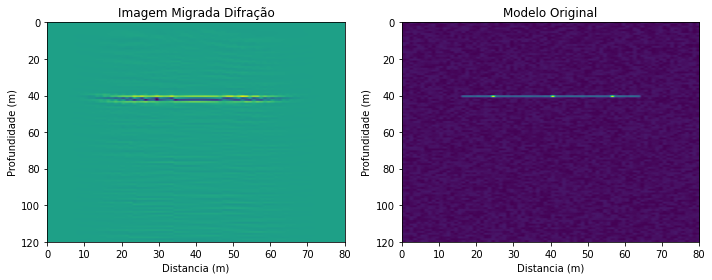

In [25]:
mig_diff = MigPreFuncoes.migvsp_winapp_diff(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Difração")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [51]:
isx=igx=40
w = MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)

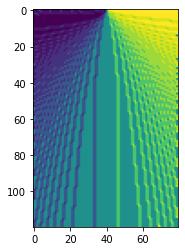

In [52]:
plt.imshow(w)

In [ ]:
def migvsp_winapp(gather,isx,dx,dz,dt,win,dwin,app,TTh,X,Y):
    """
    Calcula a migração para 1 arquivo (1 tiro) com janela (window) e abertura (aperture)
    Considera a função peso w = w(s,r,t)
    
    Entrada:
    gather - dado sísmico (nt,ntr)
    isx - posição do tiro
    dx - discretização no eixo x (m)
    dz - discretização no eixo z (m)
    dt - discretização do tempo (s)
    win - (tamanho da janela)/2
    dwin - passo da janela. Preferencialmente, dwin=dt
    app - tamanho da abertura
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    X - componente X do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    
    Saída:
    mig - imagem migrada com janela e abertura. Formato: matriz [nt,ntr]
    """
    timer=np.round(TTh/dt)+1
    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather e traveltime table tem numero diferente de traços')
        
    mig=np.zeros([nz,nx])
    
    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    # Loop over each trace of the shot gather at src isx
    for igx in range(0,ntr):
        w = peso(TTh,dt,X,Y,igx,isx)
        trace_win = np.zeros([nz,nx])
        R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        trace_app = taper(ntr,nz,app,isx,igx) 
        
        for j in range(len(window)):
            t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            twin = t + window[j]
            t2 = (twin<nt)*twin 
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
            trace1 = trace1.reshape([nz,nx])*(w) 
            trace1 = trace1*trace_app
            trace_win = trace_win+trace1
        
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace_win*obli
        
    return mig

In [45]:
M1 = np.ones([3,3])
M2 = np.ones([3,3])*2

M2[1,:] = 4
M2[2,:] = 6

M3 = np.ones([3,3])*3

M3[1,:] = 6
M3[2,:] = 9

In [46]:
M = np.ones([3,3,3])
M[0,:,:] = M1
M[1,:,:] = M2
M[2,:,:] = M3

M[0,:,:]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [48]:
grad1 = np.gradient(M, axis=1)
grad1

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]])

In [49]:
grad2 = np.gradient(M, axis=2)
grad2

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])